In [200]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

# Read CSV
## Read Training Data

In [264]:
training1 = pd.read_csv("data/training1.csv")
training1.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,0.96629,0.00000,0.000000,0.184890,1.3535,0.00000,0.66736,0.00000,0.30246,0.00000,...,0.025722,0.029769,0.022448,0.018352,0.059976,0.018121,0.034956,0.018626,0.0,1.00
1,0.42980,0.00000,0.142340,0.000000,0.0000,0.00000,0.00000,0.83749,0.00000,0.00000,...,0.053810,0.030060,0.036972,0.039459,0.025726,0.015295,0.032943,0.015002,1.0,0.66
2,0.00000,0.00000,0.000000,0.968570,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.042560,0.045289,0.047827,0.039196,0.046091,0.020280,0.048154,0.030391,1.0,1.00
3,0.00000,0.13278,0.032179,0.742990,0.0000,0.67521,0.00000,0.18638,1.06300,0.74294,...,0.040872,0.035247,0.033755,0.049919,0.058322,0.027145,0.018040,0.030181,1.0,1.00
4,0.00000,0.12242,0.627020,0.017635,0.0000,0.00000,0.28884,1.10050,0.00000,0.15511,...,0.025219,0.005606,0.024671,0.025305,0.025466,0.023212,0.011266,0.035695,0.0,0.66


In [265]:
training2 = pd.read_csv("data/training2.csv")
training2.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,NaN,0.00000,0.647370,0.019139,NaN,NaN,0.000000,0.00000,0.00000,0.0,...,0.005475,NaN,0.006080,0.028959,0.002790,0.005990,0.004538,0.003314,1.0,0.66
1,0.0,2.34540,NaN,0.000000,0.0000,0.0000,0.000000,0.94839,NaN,NaN,...,NaN,0.059948,0.040517,NaN,0.044280,0.037300,0.049929,NaN,1.0,0.66
2,0.0,0.00000,0.000000,NaN,0.7051,0.0000,0.050634,0.00000,0.00000,0.0,...,0.010949,0.017014,NaN,0.035700,NaN,0.011163,0.005050,0.006523,1.0,0.66
3,0.0,0.00000,0.000000,0.093421,NaN,1.3544,0.000000,0.00000,1.96910,0.0,...,NaN,NaN,0.021848,0.033642,0.018927,0.021301,NaN,0.029996,1.0,0.66
4,NaN,0.22183,0.097833,0.000000,0.0000,0.0000,0.473380,0.47688,0.46914,0.0,...,0.086363,0.033372,0.044133,0.034509,0.032720,0.024035,0.044800,0.034548,1.0,0.66


In [266]:
training2 = training2.apply(lambda row: row.fillna(row.mean()), axis=1)
training2.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,0.260321,0.00000,0.647370,0.019139,0.260321,0.260321,0.000000,0.00000,0.000000,0.000000,...,0.005475,0.260321,0.006080,0.028959,0.002790,0.005990,0.004538,0.003314,1.0,0.66
1,0.000000,2.34540,0.195959,0.000000,0.000000,0.000000,0.000000,0.94839,0.195959,0.195959,...,0.195959,0.059948,0.040517,0.195959,0.044280,0.037300,0.049929,0.195959,1.0,0.66
2,0.000000,0.00000,0.000000,0.137924,0.705100,0.000000,0.050634,0.00000,0.000000,0.000000,...,0.010949,0.017014,0.137924,0.035700,0.137924,0.011163,0.005050,0.006523,1.0,0.66
3,0.000000,0.00000,0.000000,0.093421,0.207263,1.354400,0.000000,0.00000,1.969100,0.000000,...,0.207263,0.207263,0.021848,0.033642,0.018927,0.021301,0.207263,0.029996,1.0,0.66
4,0.257160,0.22183,0.097833,0.000000,0.000000,0.000000,0.473380,0.47688,0.469140,0.000000,...,0.086363,0.033372,0.044133,0.034509,0.032720,0.024035,0.044800,0.034548,1.0,0.66


In [273]:
df = pd.concat([training1, training2], axis=0)

In [274]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

## Read Testing Data

In [275]:
X_test = pd.read_csv('data/test.csv')
X_test.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.787990,NaN,2.0246,0.00000,0.00000,3.29550,0.00000,0.12965,0.00000,NaN,...,NaN,0.034861,0.045078,NaN,NaN,0.031250,0.026715,0.007441,0.028426,NaN
1,0.000000,0.72265,NaN,0.15856,NaN,NaN,0.00000,0.00000,NaN,0.0,...,0.004348,0.007177,0.014610,NaN,0.007715,0.014736,0.009790,0.036324,NaN,NaN
2,0.000000,NaN,0.0000,0.00000,0.64827,0.48099,0.00000,0.71721,0.70541,0.0,...,0.026724,0.027204,0.021123,0.027027,0.029328,0.031330,NaN,0.013995,0.033780,0.013178
3,0.044644,0.00000,NaN,0.71294,0.00000,NaN,NaN,0.00000,0.00000,0.0,...,0.026242,0.029739,0.025212,NaN,0.021912,0.020740,0.024278,0.001928,0.015194,0.023487
4,0.848170,NaN,0.0000,NaN,0.00000,0.00000,0.25626,0.00000,0.79886,0.0,...,0.003493,0.002661,NaN,0.069194,0.040851,0.006043,NaN,0.035340,0.024834,0.076113


## Read Test Labels

In [276]:
y_test = pd.read_csv('data/sample_valid_predictions.csv')

##  utils

In [277]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,precision_score, recall_score, f1_score

def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count


def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))

    
def RF_feature_imp(X, y, imp_features):
    model = RandomForestClassifier()
    # fit the model
    model.fit(X, y)
    
    sorted_idx = model.feature_importances_.argsort()[-imp_features:]
    plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel("Random Forest Feature Importance")
    return sorted_idx


from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    


# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name, classes):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names = classes))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set,predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')
   
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions,average='macro'),f1_score(y_test_set, predictions,average='macro')]#store results of model
    return results

## Overview of Datasets

In [300]:
printmd("**Training Set:**", color='blue')
check_shape(df)
printmd("**Training Features:**", color='blue')
check_shape(X)
printmd("**Training Labels:**", color='blue')
print("\nNumber or rows in dataset: {}".format(len(y)))
print("==========================={}".format(count_digit(len(y))*'='))
printmd("**Test Features:**", color='blue')
check_shape(X_test)
printmd("**Test Labels:**", color='blue')
check_shape(y_test)

<span style='color:blue'>**Training Set:**</span>


Number or rows in dataset: 3400

Number or columns in dataset: 4610


<span style='color:blue'>**Training Features:**</span>


Number or rows in dataset: 3400

Number or columns in dataset: 4608


<span style='color:blue'>**Training Labels:**</span>


Number or rows in dataset: 3400


<span style='color:blue'>**Test Features:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 4608


<span style='color:blue'>**Test Labels:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 1


## fill NAN values

In [279]:
X_test = X_test.apply(lambda row: row.fillna(row.mean()), axis=1)
X_test.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.787990,0.183897,2.024600,0.000000,0.000000,3.295500,0.000000,0.12965,0.000000,0.183897,...,0.183897,0.034861,0.045078,0.183897,0.183897,0.031250,0.026715,0.007441,0.028426,0.183897
1,0.000000,0.722650,0.179457,0.158560,0.179457,0.179457,0.000000,0.00000,0.179457,0.000000,...,0.004348,0.007177,0.014610,0.179457,0.007715,0.014736,0.009790,0.036324,0.179457,0.179457
2,0.000000,0.215356,0.000000,0.000000,0.648270,0.480990,0.000000,0.71721,0.705410,0.000000,...,0.026724,0.027204,0.021123,0.027027,0.029328,0.031330,0.215356,0.013995,0.033780,0.013178
3,0.044644,0.000000,0.162473,0.712940,0.000000,0.162473,0.162473,0.00000,0.000000,0.000000,...,0.026242,0.029739,0.025212,0.162473,0.021912,0.020740,0.024278,0.001928,0.015194,0.023487
4,0.848170,0.177459,0.000000,0.177459,0.000000,0.000000,0.256260,0.00000,0.798860,0.000000,...,0.003493,0.002661,0.177459,0.069194,0.040851,0.006043,0.177459,0.035340,0.024834,0.076113


# Feature Selection
## RF feature Selection

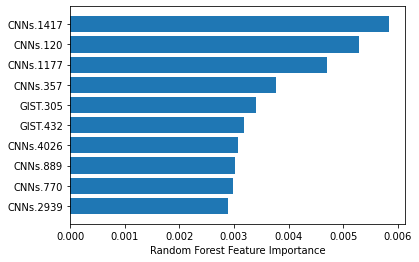

In [280]:
sorted_idx = RF_feature_imp(X, y, 10)

In [281]:
X_train = X[X.columns[sorted_idx]]
y_train = y

XX_test = X_test[X_test.columns[sorted_idx]]
y_test = y_test


printmd("**Training Features:**", color='blue')
check_shape(X_train)
printmd("**Training Labels:**", color='blue')
print("\nNumber or rows in dataset: {}".format(len(y_train)))
print("==========================={}".format(count_digit(len(y_train))*'='))
printmd("**Test Features:**", color='blue')
check_shape(XX_test)
printmd("**Test Labels:**", color='blue')
check_shape(y_test)

<span style='color:blue'>**Training Features:**</span>


Number or rows in dataset: 3400

Number or columns in dataset: 10


<span style='color:blue'>**Training Labels:**</span>


Number or rows in dataset: 3400


<span style='color:blue'>**Test Features:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 10


<span style='color:blue'>**Test Labels:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 1


## PCA

In [282]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X)
XX_test = pca.transform(X_test)

printmd("**Training Features:**", color='blue')
check_shape(X_train)
printmd("**Training Labels:**", color='blue')
print("\nNumber or rows in dataset: {}".format(len(y_train)))
print("==========================={}".format(count_digit(len(y_train))*'='))
printmd("**Test Features:**", color='blue')
check_shape(XX_test)
printmd("**Test Labels:**", color='blue')
check_shape(y_test)

<span style='color:blue'>**Training Features:**</span>


Number or rows in dataset: 3400

Number or columns in dataset: 10


<span style='color:blue'>**Training Labels:**</span>


Number or rows in dataset: 3400


<span style='color:blue'>**Test Features:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 10


<span style='color:blue'>**Test Labels:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 1


# ML Models
## Random Forest

In [283]:
classes = ['0','1']
#dic form store results of all models
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}
Model_Name = "Random Forest"

model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# return model

RandomForestClassifier()

========== Random Forest ==========

Accuracy on validation set: 0.4840

Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.48      0.51      1116
           1       0.43      0.49      0.45       884

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.49      0.48      0.49      2000



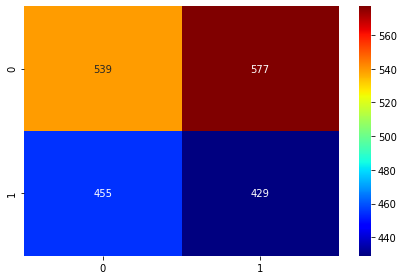

In [284]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(XX_test)
rf_results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
collect_results_of_all_model[Model_Name] = rf_results

## SVM Model

In [285]:
from sklearn.svm import SVC

Model_Name = "SVM"
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

========== SVM ==========

Accuracy on validation set: 0.4870

Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.49      0.56      1358
           1       0.31      0.48      0.38       642

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.55      0.49      0.50      2000



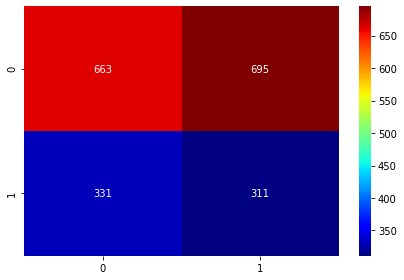

In [286]:
y_pred = clf.predict(XX_test)
results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
collect_results_of_all_model[Model_Name] = results

## KNN Model

In [287]:
from sklearn.neighbors import KNeighborsClassifier

Model_Name = "KNN"
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

========== KNN ==========

Accuracy on validation set: 0.4805

Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.48      0.51      1127
           1       0.42      0.48      0.45       873

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.49      0.48      0.48      2000



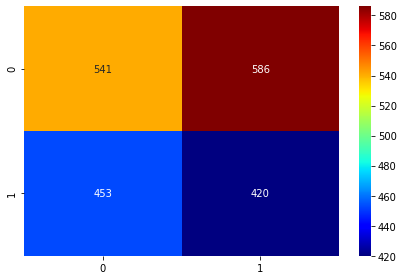

In [288]:
y_pred = knn.predict(XX_test)
results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
collect_results_of_all_model[Model_Name] = results

## MLP

In [290]:
# get train, test and validation set
X_train,  X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
# # convert target list into categorical list
# y_train1 = to_categorical(y_train,num_classes=2)
# y_test1 = to_categorical(y_test,num_classes=2)
# y_val1 = to_categorical(y_val,num_classes=2)
# # display shape of all data sets
# print("Shape of y_train",y_train1.shape)
# print("Shape of y_test",y_test1.shape)
# print("Shape of y_test",y_val1.shape)

In [291]:
X_train.shape

(3060, 4608)

In [298]:
#Neural network module
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

# model development
model=Sequential()
model.add(Dense(2000,input_dim=4608, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2000)              9218000   
_________________________________________________________________
dense_29 (Dense)             (None, 100)               200100    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_32 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_34 (Dense)             (None, 20)               

In [299]:
# congigure early stopping teachnique
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, min_delta=.001, verbose=True, mode='max')
# fit model
model.fit(X_train,y_train,validation_data=(X_val,y_val), batch_size=20,epochs=50,verbose=1, callbacks=[callback])

Epoch 1/50
153/153 [==============================] - 6s 38ms/step - loss: 0.5870 - accuracy: 0.7163 - val_loss: 0.6013 - val_accuracy: 0.7265
Epoch 2/50
153/153 [==============================] - 6s 38ms/step - loss: 0.5327 - accuracy: 0.7520 - val_loss: 0.5968 - val_accuracy: 0.7471
Epoch 3/50
153/153 [==============================] - 6s 38ms/step - loss: 0.4841 - accuracy: 0.7771 - val_loss: 0.5966 - val_accuracy: 0.7324
Epoch 4/50
153/153 [==============================] - 6s 38ms/step - loss: 0.4247 - accuracy: 0.8056 - val_loss: 0.6771 - val_accuracy: 0.7088
Epoch 5/50
153/153 [==============================] - 6s 38ms/step - loss: 0.3666 - accuracy: 0.8366 - val_loss: 0.8195 - val_accuracy: 0.7118
Epoch 6/50
153/153 [==============================] - 6s 38ms/step - loss: 0.2901 - accuracy: 0.8693 - val_loss: 0.7007 - val_accuracy: 0.6853
Epoch 7/50
153/153 [==============================] - 6s 38ms/step - loss: 0.2239 - accuracy: 0.9049 - val_loss: 1.2686 - val_accuracy: 0.6588

In [294]:
Model_Name = "CNN"
# make prediction using trained model
predictions = model.predict(X_test)
# calculate accuracy and other evaluation measures
# y_pred = [np.argmax(prediction) for prediction in predictions]
# results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
# collect_results_of_all_model[Model_Name] = results

In [295]:
predictions

array([[0.9999855 ],
       [0.99623245],
       [0.9999996 ],
       ...,
       [0.9999992 ],
       [0.02548835],
       [0.99015284]], dtype=float32)

In [296]:
for prediction in predictions:
    print(prediction)

[0.9999855]
[0.99623245]
[0.9999996]
[8.2887514e-10]
[0.00238571]
[0.39916527]
[0.40613145]
[9.745542e-07]
[0.9946164]
[6.360588e-05]
[0.9848881]
[0.9999529]
[5.3656386e-06]
[1.]
[0.9099001]
[6.339199e-07]
[0.08650005]
[0.99989444]
[5.2465764e-11]
[7.885262e-10]
[0.99991655]
[4.015005e-09]
[0.00221702]
[0.99995476]
[0.9999857]
[9.199897e-08]
[1.14585006e-07]
[0.9999793]
[9.050738e-08]
[0.9999181]
[0.25656414]
[0.9986489]
[2.7865834e-08]
[0.00089556]
[0.05919844]
[0.9998524]
[0.9997367]
[0.8175994]
[0.9918558]
[0.999545]
[2.9246596e-06]
[3.278121e-07]
[1.3078238e-10]
[0.88503385]
[0.12703738]
[2.511483e-08]
[2.409671e-07]
[0.30477172]
[0.99999505]
[1.1403884e-07]
[0.9443921]
[1.]
[0.38515297]
[0.9970938]
[3.133983e-05]
[3.3464894e-05]
[3.4879682e-05]
[0.99970853]
[0.9999987]
[0.05785826]
[0.9999543]
[0.99551904]
[0.9415795]
[0.9996473]
[0.05817142]
[0.14947292]
[0.00063515]
[0.43733573]
[0.992434]
[1.8312903e-05]
[0.9999888]
[2.6634444e-07]
[0.9715147]
[0.8691292]
[0.8703862]
[0.9993615

[3.3230062e-05]
[7.3849515e-05]
[1.3276764e-07]
[2.6358335e-05]
[0.9999708]
[0.99981666]
[0.00131404]
[0.27623725]
[0.03628525]
[7.0147e-05]
[2.423748e-11]
[0.99919844]
[1.0569373e-05]
[5.809129e-10]
[0.19315785]
[0.8268591]
[0.99885416]
[0.9999941]
[0.01288047]
[1.2980308e-05]
[0.9999908]
[0.0009864]
[0.9999928]
[1.3934546e-06]
[0.00014549]
[0.99993026]
[0.00023869]
[8.884051e-11]
[2.0645462e-08]
[0.999998]
[1.2427248e-05]
[0.99999416]
[0.00420234]
[4.7858135e-05]
[0.99661607]
[3.7935574e-06]
[0.99999976]
[0.15377113]
[0.989537]
[1.07128145e-07]
[0.9999862]
[5.042751e-05]
[0.00253043]
[0.00021061]
[0.36434555]
[0.07313386]
[0.99779356]
[2.7396234e-05]
[2.8268336e-05]
[4.027982e-06]
[0.02277702]
[0.9991555]
[0.62350047]
[0.08613101]
[0.96892905]
[0.00034773]
[1.]
[0.00095326]
[6.1412214e-07]
[0.91892177]
[0.99999976]
[0.71044874]
[3.918871e-06]
[0.10000622]
[5.51978e-07]
[0.44676852]
[0.0376296]
[0.6537008]
[0.99999857]
[6.9704595e-07]
[0.0012646]
[0.73423886]
[1.4459577e-05]
[4.094581

In [297]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 9ms/step - loss: 4.8545 - accuracy: 0.4945


[4.854453086853027, 0.4945000112056732]

In [259]:
X_train.shape

(480, 4608)

In [260]:
y_train.shape

(480,)

In [261]:
X_val.shape

(120, 4608)

In [262]:
y_val.shape

(120,)

In [263]:
X_test.shape

(2000, 4608)